## Script para entender todo lo relacionado con coeficientes de correlacion

Correlación de Pearson. Está dentro de [-1, 1]
$$Corr(x,y)=\frac{Cov(x,y)}{\sqrt{Var(x)}\sqrt{Var(y)}}$$

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Correlation coefficient between x and y: 0.80


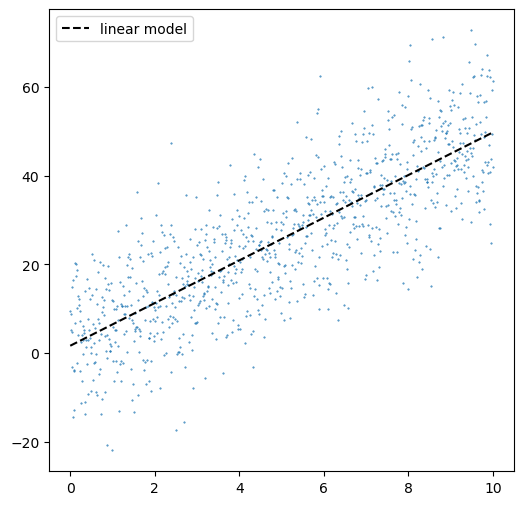

In [36]:
data_n = 1000
x = np.linspace(0,10, data_n)
y = 5*x+1+np.random.normal(0, 10, data_n)

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

m = model.coef_
b = model.intercept_

print(f"Correlation coefficient between x and y: {pearsonr(x, y)[0]:.2f}")

f, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, s = .2)
ax.plot(x, m*x+b, color='black', label='linear model', linestyle='--')
plt.legend()
plt.show()

Correlation coefficient between x and y: 0.82


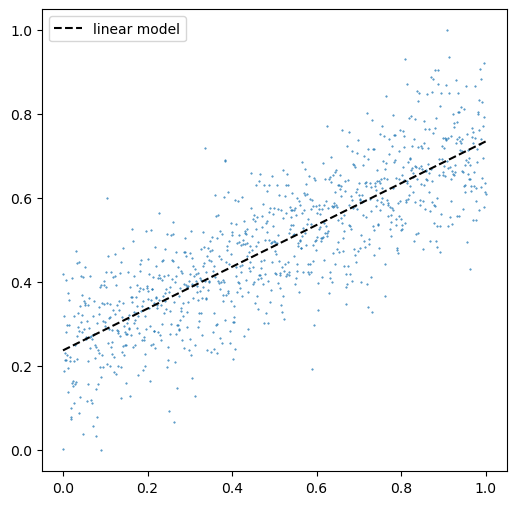

In [35]:
norm_scaler = MinMaxScaler()

x_norm = norm_scaler.fit_transform(x.reshape(-1, 1)).ravel()
y_norm = norm_scaler.fit_transform(y.reshape(-1, 1)).ravel()

model = LinearRegression()
model.fit(x_norm.reshape(-1, 1), y_norm)

m = model.coef_
b = model.intercept_

print(f"Correlation coefficient between x and y: {pearsonr(x_norm, y_norm)[0]:.2f}")

f, ax = plt.subplots(figsize=(6,6))
ax.scatter(x_norm, y_norm, s = .2)
ax.plot(x_norm, m*x_norm+b, color='black', label='linear model', linestyle='--')
plt.legend()
plt.show()




Algo relacionado con el coeficiente de spearman ??? Creo que se puede utilizar para relaciones no lineales